In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (for later steps)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import skew

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error



df = pd.read_csv("Student_performance_data .csv")
#Displaying the first few rows
display(df.head()) 

df = df.drop('StudentID', axis=1) #dropping the studentId column because you don't need it for this analysis it's just an identifier 
display(df.info())

print("\nSummary statistics:")
df.describe().T



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


None


Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


# Exploratory Data Analysis

# Univariate Analysis

## Numerical variables


Age Summary:


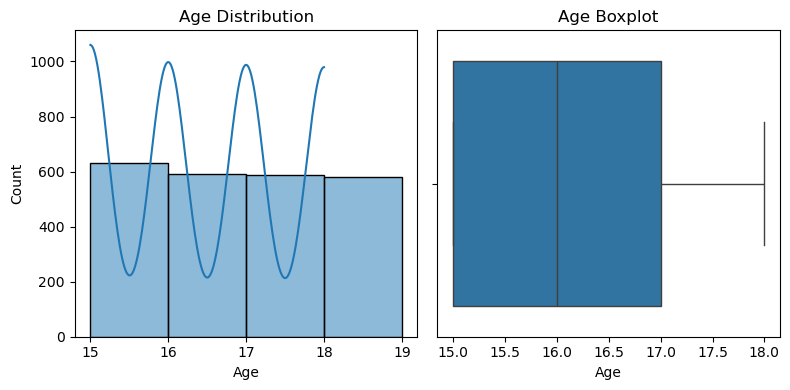

In [3]:
# AGE
print("\nAge Summary:")
#display(df['Age'].describe())

plt.figure(figsize=(8, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=range(15,20))
plt.xticks(ticks=range(15, 20, 1))
plt.title("Age Distribution")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title("Age Boxplot")

plt.tight_layout()
plt.show()


Study Time Weekly:


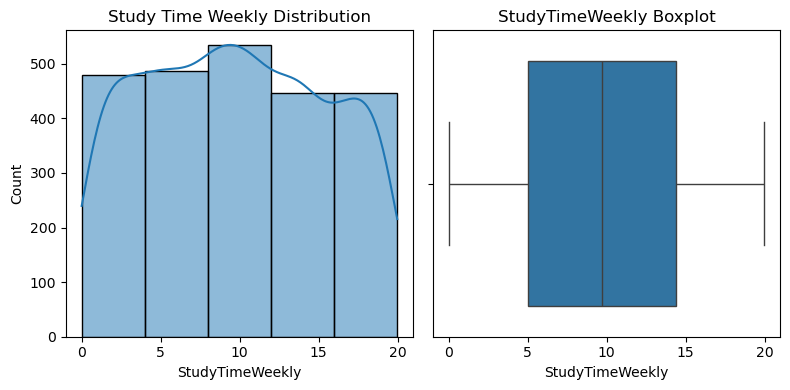

In [4]:
# StudyTimeWeekly
print("Study Time Weekly:")

plt.figure(figsize=(8, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['StudyTimeWeekly'], kde=True, bins=5)
plt.title("Study Time Weekly Distribution")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['StudyTimeWeekly'])
plt.title("StudyTimeWeekly Boxplot")

plt.tight_layout()
plt.show()


Absences:


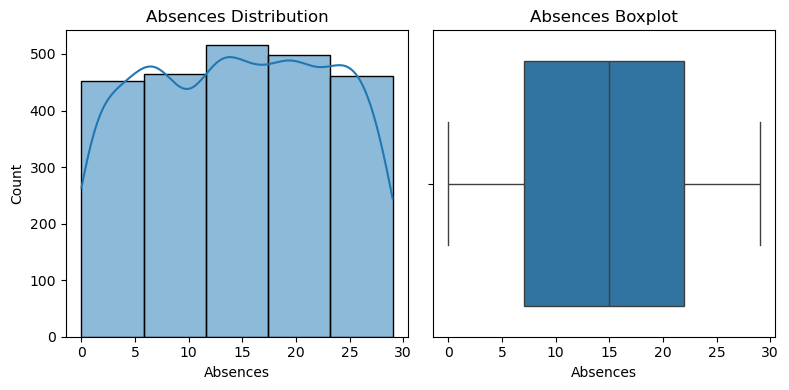

In [5]:
# Absences
print("Absences:")

plt.figure(figsize=(8, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Absences'], kde=True, bins=5)
plt.title("Absences Distribution")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Absences'])
plt.title("Absences Boxplot")

plt.tight_layout()
plt.show()


GPA Summary:


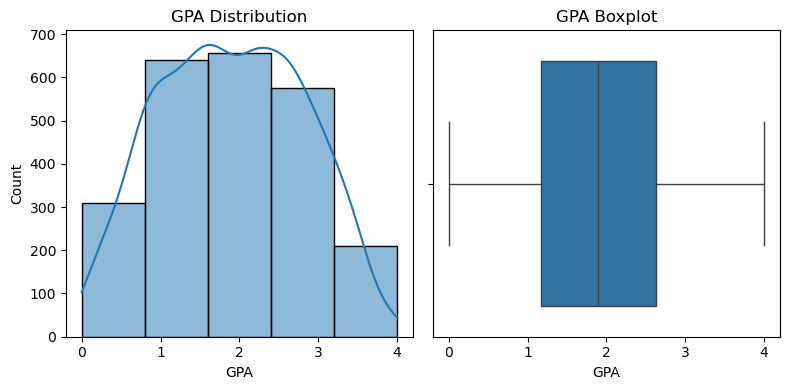

In [6]:
# GPA
print("GPA Summary:")

plt.figure(figsize=(8, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['GPA'], kde=True, bins=5)
plt.title("GPA Distribution")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['GPA'])
plt.title("GPA Boxplot")

plt.tight_layout()
plt.show()


## categorical variables

In [7]:
# Labeling maps for better readability
label_maps = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'ParentalEducation': {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher Study'},
    'Tutoring': {0: 'No', 1: 'Yes'},
    'ParentalSupport': {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'},
    'Extracurricular': {0: 'No', 1: 'Yes'},
    'Sports': {0: 'No', 1: 'Yes'},
    'Music': {0: 'No', 1: 'Yes'},
    'Volunteering': {0: 'No', 1: 'Yes'},
    'GradeClass': {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
}

Gender
Female    1222
Male      1170
Name: count, dtype: int64


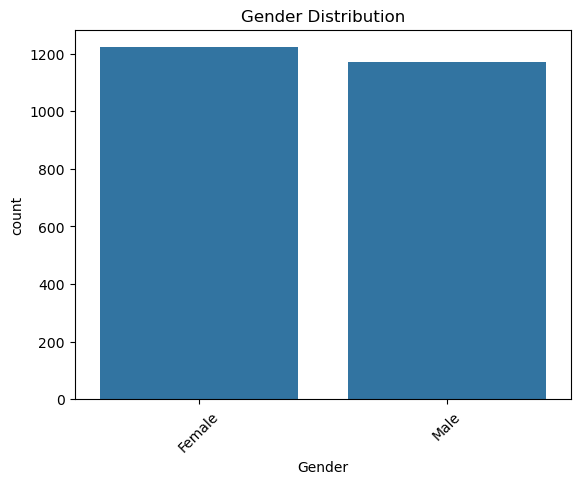

In [8]:
# GENDER
col='Gender'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Gender Distribution")
plt.xticks(rotation=45)
plt.show()


Ethnicity
Caucasian           1207
African American     493
Asian                470
Other                222
Name: count, dtype: int64


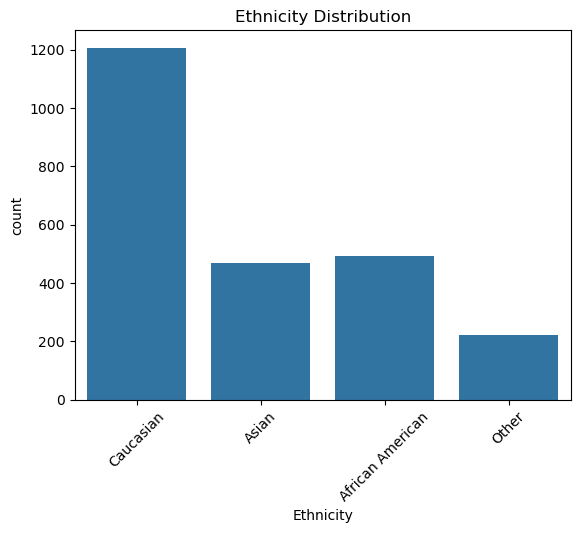

In [9]:
# Ethnicity
col='Ethnicity'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Ethnicity Distribution")
plt.xticks(rotation=45)
plt.show()

ParentalEducation
Some College    934
High School     728
Bachelor's      367
None            243
Higher Study    120
Name: count, dtype: int64


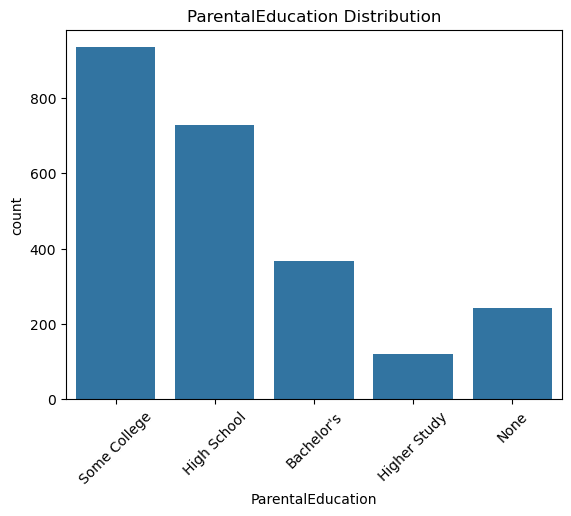

In [10]:
# ParentalEducation
col='ParentalEducation'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("ParentalEducation Distribution")
plt.xticks(rotation=45)
plt.show()

Tutoring
No     1671
Yes     721
Name: count, dtype: int64


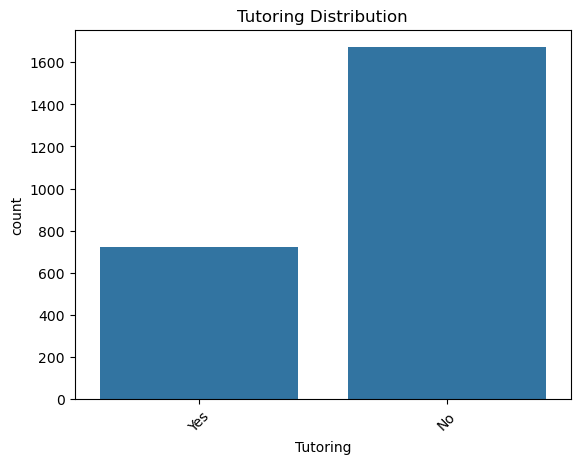

In [11]:
# Tutoring
col='Tutoring'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Tutoring Distribution")
plt.xticks(rotation=45)
plt.show()

ParentalSupport
Moderate     740
High         697
Low          489
Very High    254
None         212
Name: count, dtype: int64


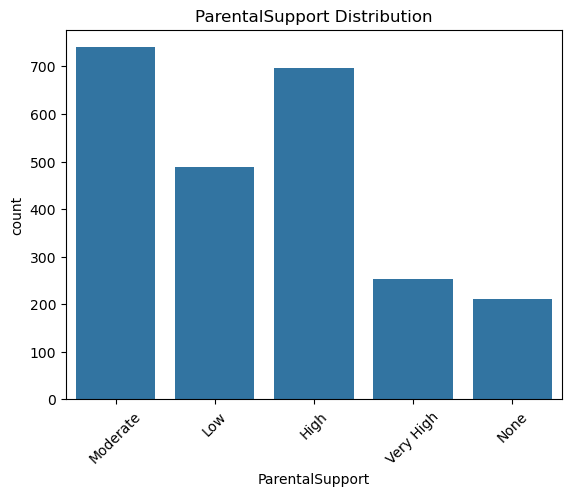

In [12]:
# ParentalSupport
col='ParentalSupport'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("ParentalSupport Distribution")
plt.xticks(rotation=45)
plt.show()

Extracurricular
No     1475
Yes     917
Name: count, dtype: int64


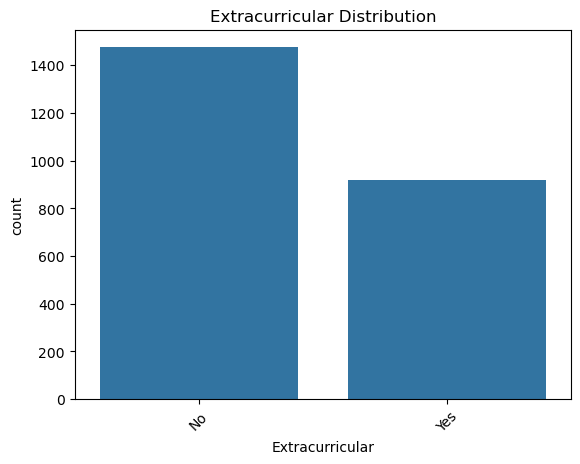

In [13]:
# Extracurricular
col='Extracurricular'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Extracurricular Distribution")
plt.xticks(rotation=45)
plt.show()

Sports
No     1666
Yes     726
Name: count, dtype: int64


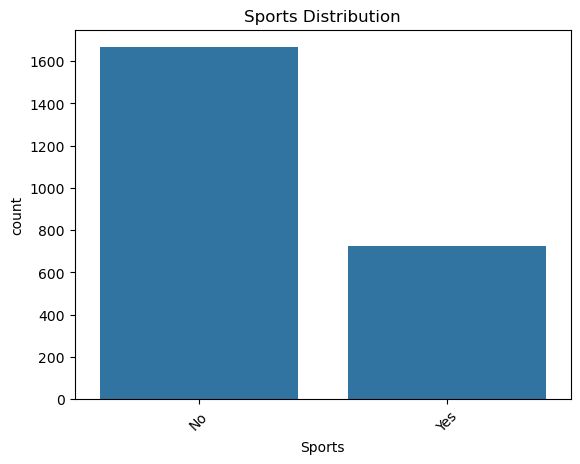

In [14]:
# Sports
col='Sports'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Sports Distribution")
plt.xticks(rotation=45)
plt.show()

Music
No     1921
Yes     471
Name: count, dtype: int64


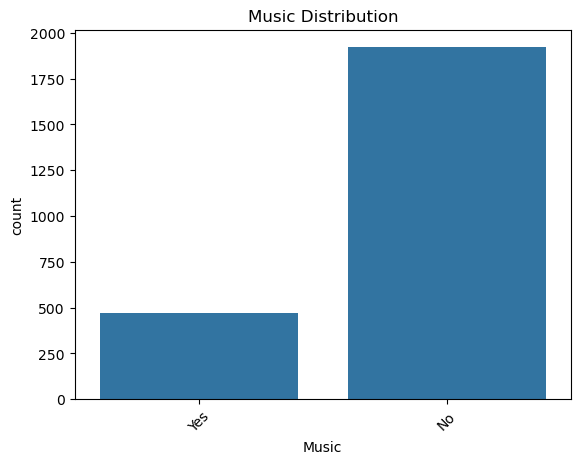

In [15]:
# Music
col='Music'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Music Distribution")
plt.xticks(rotation=45)
plt.show()

Volunteering
No     2016
Yes     376
Name: count, dtype: int64


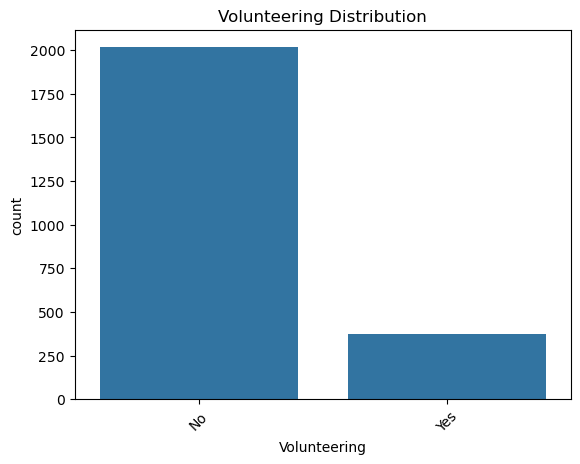

In [16]:
# Volunteering
col='Volunteering'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("Volunteering Distribution")
plt.xticks(rotation=45)
plt.show()

GradeClass
F    1211
D     414
C     391
B     269
A     107
Name: count, dtype: int64


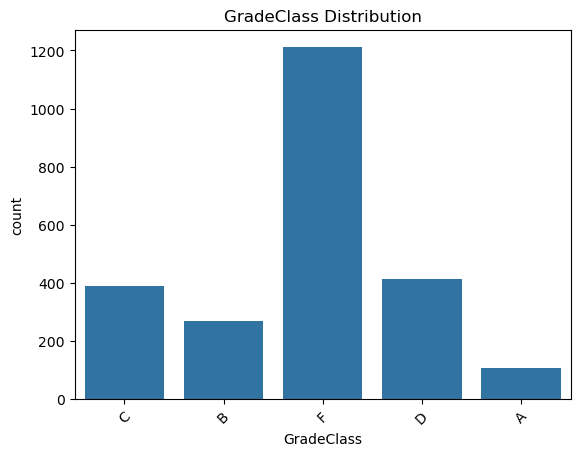

In [17]:
# GradeClass
col='GradeClass'
mapped_values = df[col].map(label_maps[col])
print(mapped_values.value_counts())

sns.countplot(x=df[col].map(label_maps[col]))
plt.title("GradeClass Distribution")
plt.xticks(rotation=45)
plt.show()

In [18]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Bivariate Analysis

In [19]:
# Correlation Plot Function
def CorrPlot(df, dropDuplicates=True, figsize=(8, 6)):
    df = np.abs(df.corr())  # Absolute value for clearer heatmap
    
    if dropDuplicates:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    
    sns.set_style('white')
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, annot=True,
                    square=True, linewidths=0.5, cbar_kws={"shrink": 0.75}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, annot=True,
                    square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

In [20]:
df.corr()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


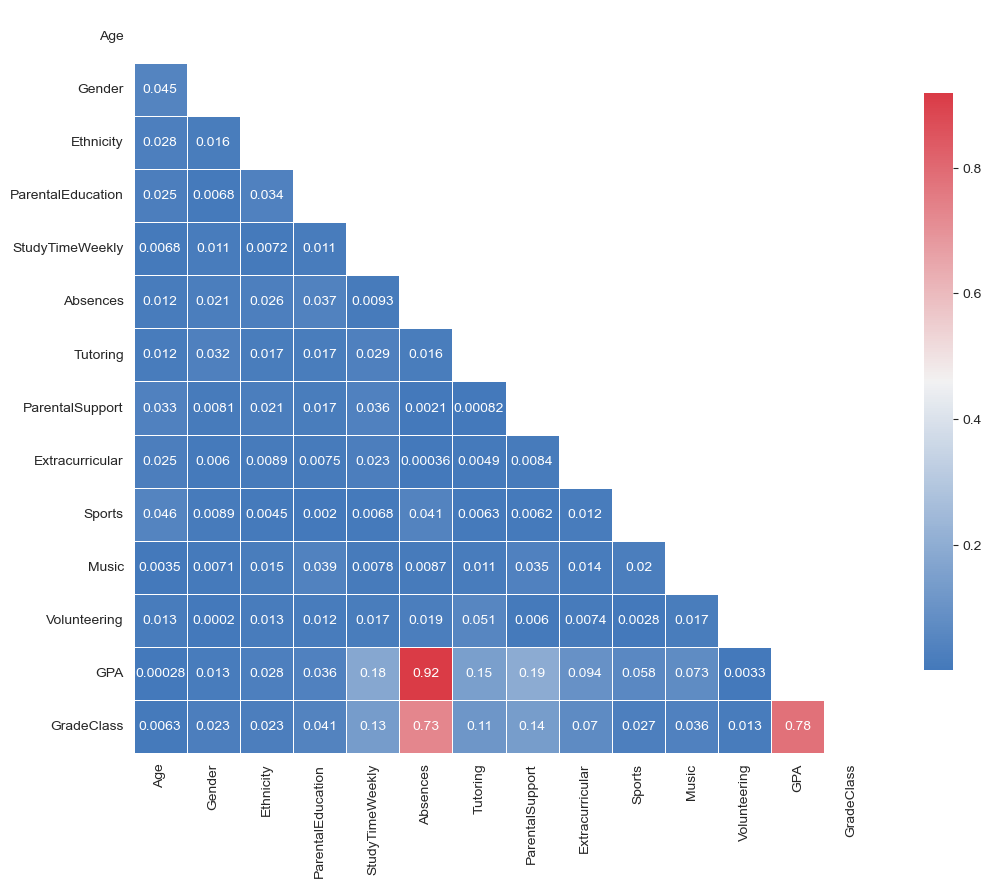

In [21]:
CorrPlot(df, figsize = (12, 10))

 Scatter Plot & Linear Regression: Absences vs GPA

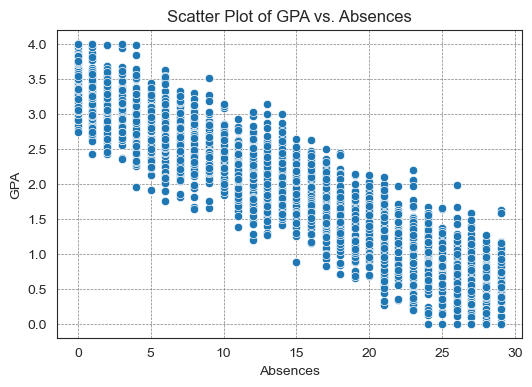

In [22]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Absences", y="GPA")
plt.title("Scatter Plot of GPA vs. Absences")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

Box Plots:Numerical Fetaures vs GradeClass

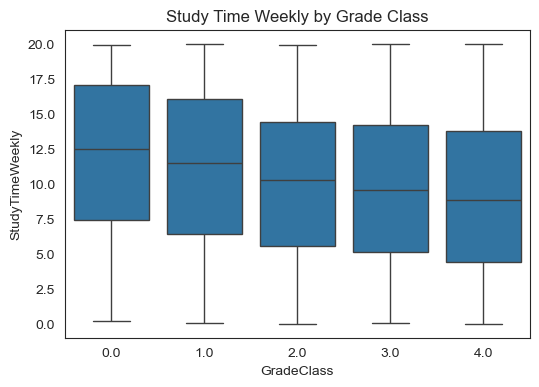

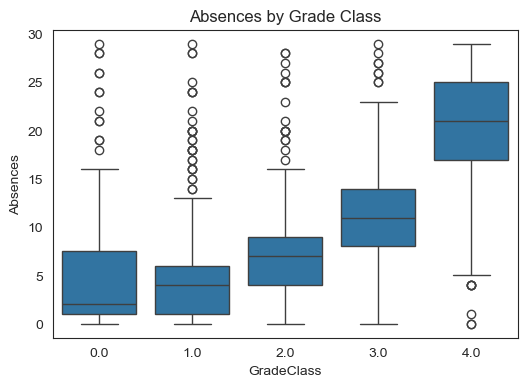

In [23]:
# Study Time vs GradeClass
plt.figure(figsize=(6, 4))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df)
plt.title("Study Time Weekly by Grade Class")
plt.show()

# Absences vs GradeClass
plt.figure(figsize=(6, 4))
sns.boxplot(x='GradeClass', y='Absences', data=df)
plt.title("Absences by Grade Class")
plt.show()

Count Plots:Categorical Features vs GradeClass

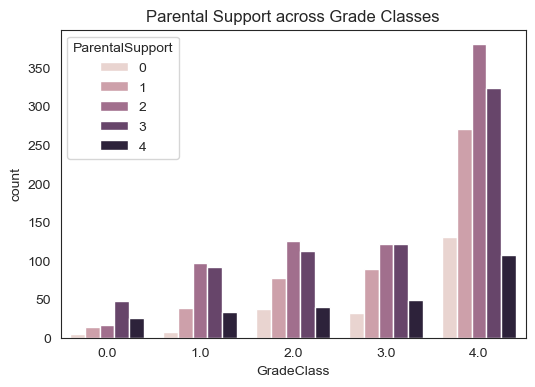

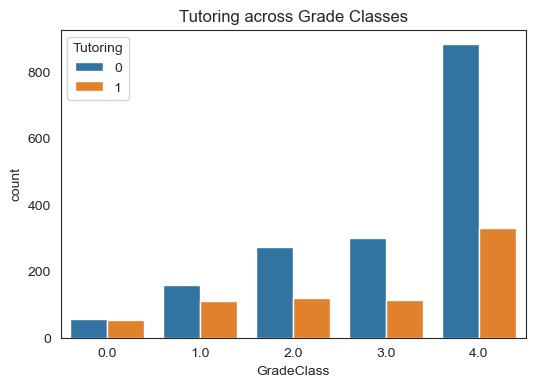

In [24]:
# Parental Support vs GradeClass
plt.figure(figsize=(6, 4))
sns.countplot(x='GradeClass', hue='ParentalSupport', data=df)
plt.title("Parental Support across Grade Classes")
plt.show()

# Tutoring vs GradeClass
plt.figure(figsize=(6, 4))
sns.countplot(x='GradeClass', hue='Tutoring', data=df)
plt.title("Tutoring across Grade Classes")
plt.show()

Stacked Bar Chart: Extracurricular vs GradeClass

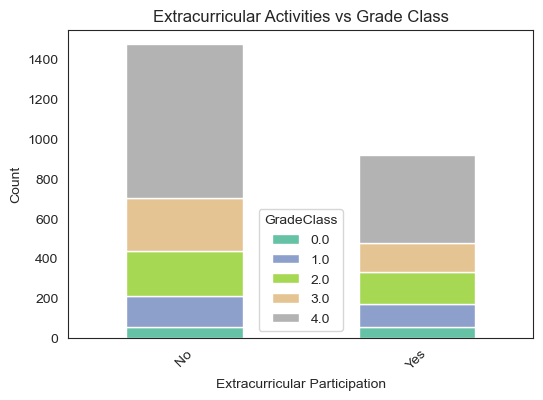

In [48]:
# Stacked bar: Extracurricular vs GradeClass
cross_tab = pd.crosstab(df['Extracurricular'].map({0: 'No', 1: 'Yes'}), df['GradeClass'])
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')
plt.title("Extracurricular Activities vs Grade Class")
plt.xlabel("Extracurricular Participation")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title="GradeClass")
plt.show()


Missing Values and Outlier treatment

In [26]:
#Checking for Missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Result: No missing values detected
print("\n No missing values found in the dataset.")

#Outlier Detection using Boxplots and Statistical Summaries

print("\n No outliers found based on visual inspection and boxplot analysis.")





Missing values in each column:
 Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

 No missing values found in the dataset.

 No outliers found based on visual inspection and boxplot analysis.


In [27]:
df.head()
df.shape

(2392, 14)

Feature Engineering

In [28]:
print("Skewness of Features:\n")
for col in df.select_dtypes(include='number').columns:
    skew_val = df[col].skew()
    print(f"{col}: {skew_val:.2f}")


Skewness of Features:

Age: 0.04
Gender: -0.04
Ethnicity: 0.76
ParentalEducation: 0.22
StudyTimeWeekly: 0.05
Absences: -0.03
Tutoring: 0.87
ParentalSupport: -0.17
Extracurricular: 0.48
Sports: 0.86
Music: 1.53
Volunteering: 1.88
GPA: 0.01
GradeClass: -0.90


In [29]:

#Drop Columns that cannot be used as predictors
df.drop(columns=['GPA'], inplace=True) #GradeClass is derived from GPA so we drop it

#Feature Transformation

#split Features and target
X = df.drop(columns=['GradeClass'])#We dropping it because it is the label we want to predict
y = df['GradeClass']

#Splitting the data into Training,Validation, Testing
#. First split: 80% train_val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)
# Second split: From the 80% split into 64% train and 16% val
# Which means split 80% into 80/20 again → (64% train, 16% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.20,  # 20% of 80% = 16% overall
    random_state=42,
    stratify=y_temp
)


# Feature Scaling (only numerical features)
num_feats = ['Age', 'StudyTimeWeekly', 'Absences']  # Numerical features
scaler = StandardScaler()

# Fit only on the train data and transform train, val, and test accordingly
X_train[num_feats] = scaler.fit_transform(X_train[num_feats])  # Fit and transform on train
X_val[num_feats] = scaler.transform(X_val[num_feats])         # Transform on validation
X_test[num_feats] = scaler.transform(X_test[num_feats])       # Transform on test

# Final check on the shapes of the splits
print(" Shapes after processing:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)








 Shapes after processing:
X_train: (1530, 12)
X_val: (383, 12)
X_test: (479, 12)
y_train: (1530,)
y_val: (383,)
y_test: (479,)


Save CSVs


In [30]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [31]:
# 5. Add target columns back to the dataframes
X_train['GradeClass'] = y_train  # Adding the target back to the train set
X_val['GradeClass'] = y_val      # Adding the target back to the validation set
X_test['GradeClass'] = y_test    # Adding the target back to the test set

# 6. Save to CSV files
X_train.to_csv('train_data.csv', index=False)
X_val.to_csv('validation_data.csv', index=False)
X_test.to_csv('test_data.csv', index=False)

print("CSV files saved!")

CSV files saved!


Model Building:Part 1(Logistic Regression, Random Forest, and XGBoost)

🔹 Logistic Regression Evaluation:
Validation Accuracy: 0.7389033942558747
Test Accuracy: 0.7244258872651357


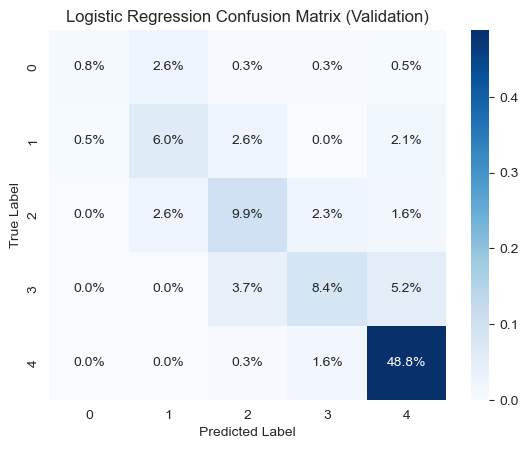

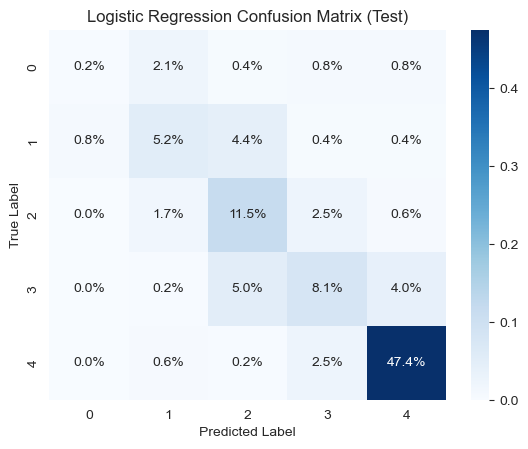

Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       0.60      0.18      0.27        17
         1.0       0.53      0.53      0.53        43
         2.0       0.59      0.60      0.60        63
         3.0       0.67      0.48      0.56        66
         4.0       0.84      0.96      0.90       194

    accuracy                           0.74       383
   macro avg       0.65      0.55      0.57       383
weighted avg       0.72      0.74      0.72       383



In [32]:
# Import necessary libraries
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train.drop(columns='GradeClass'), y_train)  # Train the model (excluding the target column)

# Make predictions on validation and test sets
y_val_pred_log_reg = log_reg.predict(X_val.drop(columns='GradeClass'))
y_test_pred_log_reg = log_reg.predict(X_test.drop(columns='GradeClass'))

# Logistic Regression Evaluation
print("🔹 Logistic Regression Evaluation:")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_log_reg))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))

# Heatmap for the validation set
cm_val_log_reg = confusion_matrix(y_val, y_val_pred_log_reg)
cm_val_prob_log_reg = cm_val_log_reg / np.sum(cm_val_log_reg)
_ = sns.heatmap(cm_val_prob_log_reg, annot=True, cmap='Blues', fmt='.1%')
plt.title('Logistic Regression Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Heatmap for the test set
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
cm_test_prob_log_reg = cm_test_log_reg / np.sum(cm_test_log_reg)
_ = sns.heatmap(cm_test_prob_log_reg, annot=True, cmap='Blues', fmt='.1%')
plt.title('Logistic Regression Confusion Matrix (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred_log_reg))









🔹 Random Forest Evaluation:
Validation Accuracy: 0.7023498694516971
Test Accuracy: 0.6931106471816284


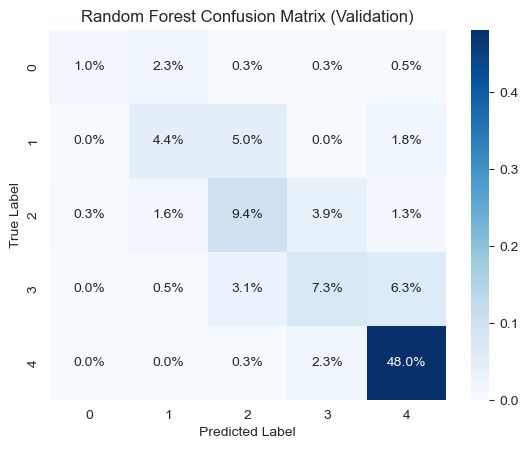

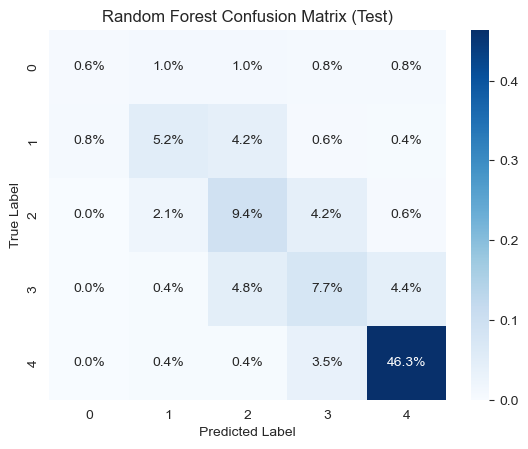

Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       0.80      0.24      0.36        17
         1.0       0.50      0.40      0.44        43
         2.0       0.52      0.57      0.55        63
         3.0       0.53      0.42      0.47        66
         4.0       0.83      0.95      0.88       194

    accuracy                           0.70       383
   macro avg       0.64      0.51      0.54       383
weighted avg       0.69      0.70      0.68       383



In [33]:
# 2. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train.drop(columns='GradeClass'), y_train)  # Train the model (excluding the target column)

# Make predictions on validation and test sets
y_val_pred_rf = rf_model.predict(X_val.drop(columns='GradeClass'))
y_test_pred_rf = rf_model.predict(X_test.drop(columns='GradeClass'))

# Random Forest Evaluation
print("\n🔹 Random Forest Evaluation:")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

# Heatmap for the validation set
cm_val_log_reg = confusion_matrix(y_val, y_val_pred_rf)
cm_val_prob_log_reg = cm_val_log_reg / np.sum(cm_val_log_reg)
_ = sns.heatmap(cm_val_prob_log_reg, annot=True, cmap='Blues', fmt='.1%')
plt.title('Random Forest Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Heatmap for the test set
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_rf)
cm_test_prob_log_reg = cm_test_log_reg / np.sum(cm_test_log_reg)
_ = sns.heatmap(cm_test_prob_log_reg, annot=True, cmap='Blues', fmt='.1%')
plt.title('Random Forest Confusion Matrix (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred_rf))




🔹 XGBoost Evaluation:
Validation Accuracy: 0.7049608355091384
Test Accuracy: 0.6764091858037579


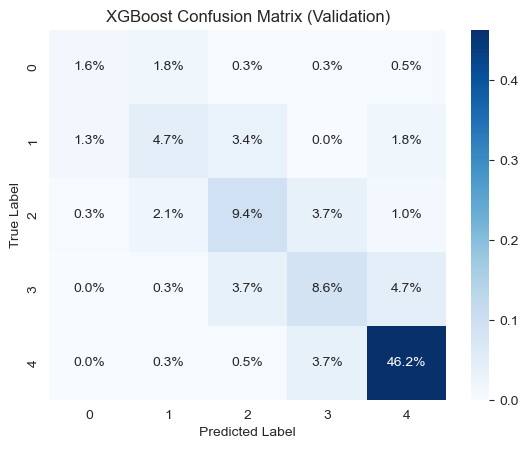

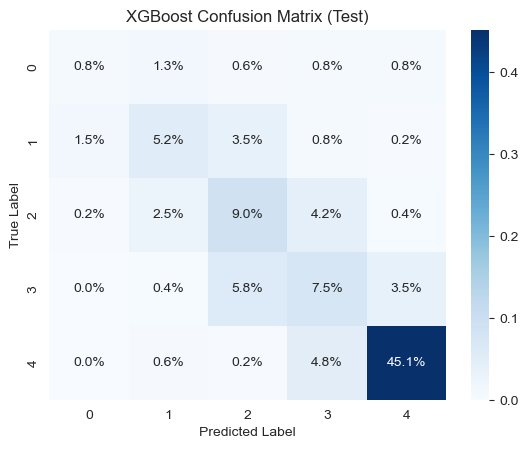

Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       0.50      0.35      0.41        17
         1.0       0.51      0.42      0.46        43
         2.0       0.55      0.57      0.56        63
         3.0       0.53      0.50      0.52        66
         4.0       0.85      0.91      0.88       194

    accuracy                           0.70       383
   macro avg       0.59      0.55      0.57       383
weighted avg       0.69      0.70      0.70       383



In [34]:
# 3. XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train.drop(columns='GradeClass'), y_train)  # Train the model (excluding the target column)

# Make predictions on validation and test sets
y_val_pred_xgb = xgb_model.predict(X_val.drop(columns='GradeClass'))
y_test_pred_xgb = xgb_model.predict(X_test.drop(columns='GradeClass'))

# XGBoost Evaluation
print("\n🔹 XGBoost Evaluation:")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb))

# Heatmap for the validation set
cm_val_log_reg = confusion_matrix(y_val, y_val_pred_xgb)
cm_val_prob_log_reg = cm_val_log_reg / np.sum(cm_val_log_reg)
_ = sns.heatmap(cm_val_prob_log_reg, annot=True, cmap='Blues', fmt='.1%')
plt.title('XGBoost Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Heatmap for the test set
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_xgb)
cm_test_prob_log_reg = cm_test_log_reg / np.sum(cm_test_log_reg)
_ = sns.heatmap(cm_test_prob_log_reg, annot=True, cmap='Blues', fmt='.1%')
plt.title('XGBoost Confusion Matrix (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred_xgb))

Visualize Model Comparison

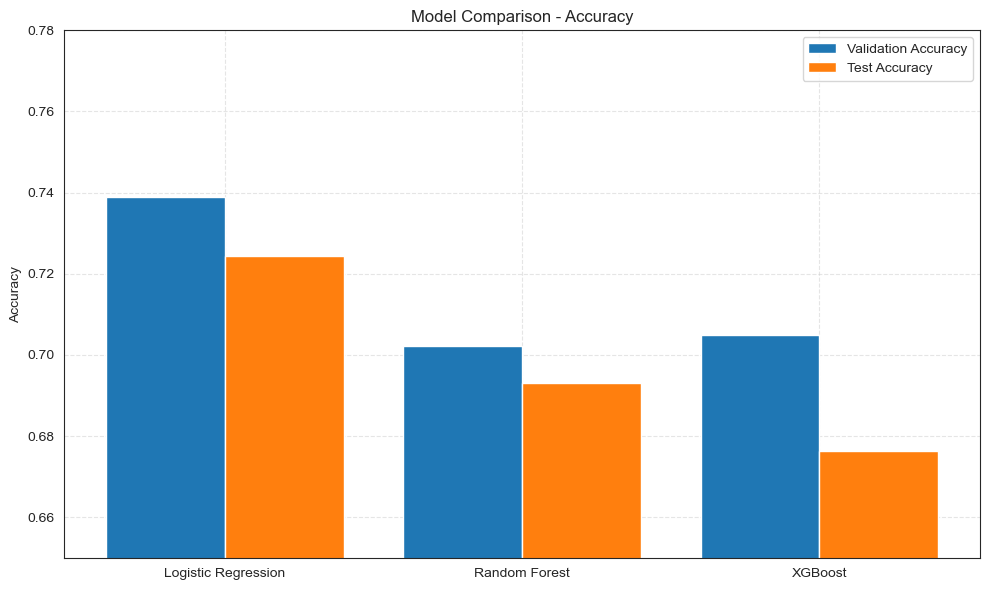

In [35]:
#Using Matplot.lib and Seaborn
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Accuracy scores
val_accuracies = [0.7389, 0.7023, 0.7050]
test_accuracies = [0.7244, 0.6931, 0.6764]

# Bar plot
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, val_accuracies, width=0.4, label='Validation Accuracy', align='center')
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0.65, 0.78)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Creating and saving plks. files for models

In [36]:
import joblib
import os

os.makedirs("artifacts", exist_ok=True)
joblib.dump(log_reg, "artifacts/model_1.pkl")
joblib.dump(rf_model, "artifacts/rf_model.pkl")
joblib.dump(xgb_model, "artifacts/model_2.pkl")

# Save feature importance
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.drop(columns='GradeClass').columns,
    'Importance': xgb_model.feature_importances_
})
feature_importance.sort_values(by="Importance", ascending=False).to_csv("artifacts/feature_importance.csv", index=False)

# Save predictions
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_xgb
})
predictions.to_csv("artifacts/predictions.csv", index=False)

XGBoost HyperParameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define your base model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Setup the GridSearch
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',  # or 'f1_weighted' if you care about F1
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best params and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Use the best model for prediction
best_xgb_model = grid_search.best_estimator_
y_val_pred_best_xgb = best_xgb_model.predict(X_val)
y_test_pred_best_xgb = best_xgb_model.predict(X_test)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:52:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best CV Accuracy: 1.0


Evaluation for the Tuned Model

Tuned XGBoost Validation Accuracy: 1.0
Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        43
         2.0       1.00      1.00      1.00        63
         3.0       1.00      1.00      1.00        66
         4.0       1.00      1.00      1.00       194

    accuracy                           1.00       383
   macro avg       1.00      1.00      1.00       383
weighted avg       1.00      1.00      1.00       383



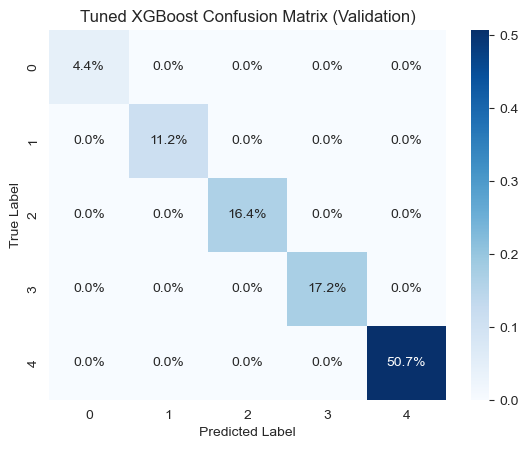

Tuned XGBoost Test Accuracy: 1.0


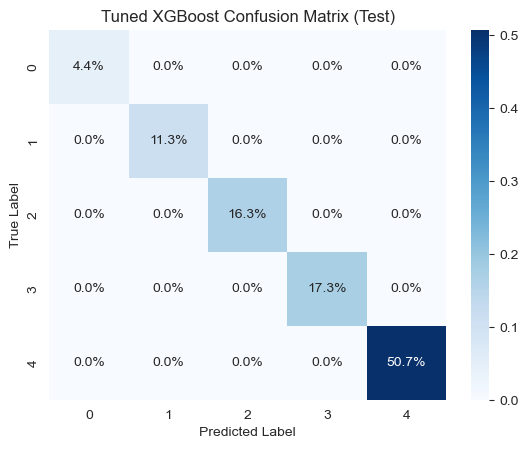

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Validation Results
print("Tuned XGBoost Validation Accuracy:", accuracy_score(y_val, y_val_pred_best_xgb))
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred_best_xgb))

# Heatmap for Tuned XGBoost - Validation Set
cm_val_xgb_tuned = confusion_matrix(y_val, y_val_pred_best_xgb)
cm_val_prob_xgb_tuned = cm_val_xgb_tuned / np.sum(cm_val_xgb_tuned)
_ = sns.heatmap(cm_val_prob_xgb_tuned, annot=True, cmap='Blues', fmt='.1%')
plt.title('Tuned XGBoost Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Test Results
print("Tuned XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred_best_xgb))

# Heatmap for Tuned XGBoost - Test Set
cm_test_xgb_tuned = confusion_matrix(y_test, y_test_pred_best_xgb)
cm_test_prob_xgb_tuned = cm_test_xgb_tuned / np.sum(cm_test_xgb_tuned)
_ = sns.heatmap(cm_test_prob_xgb_tuned, annot=True, cmap='Blues', fmt='.1%')
plt.title('Tuned XGBoost Confusion Matrix (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



""""Although hyperparameter tuning of XGBoost yielded 100% validation accuracy, this suggested overfitting. Logistic Regression provided strong, consistent performance and was selected as the final traditional ML model."""

 Model Building: Part 2 — Apply Deep Learning Classification Algorithm


MLP Validation Accuracy: 0.9843
MLP Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        63
           3       0.98      0.92      0.95        66
           4       0.97      1.00      0.99       194

    accuracy                           0.98       383
   macro avg       0.99      0.98      0.99       383
weighted avg       0.98      0.98      0.98       383



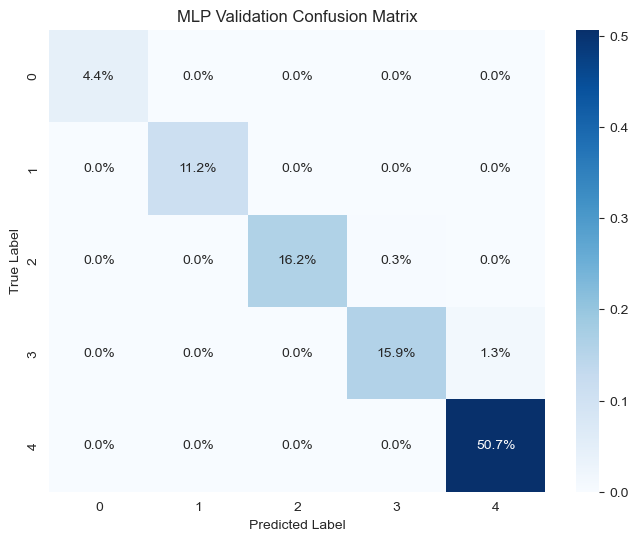


MLP Test Accuracy: 0.9812
MLP Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        78
           3       0.94      0.96      0.95        83
           4       0.99      0.98      0.98       243

    accuracy                           0.98       479
   macro avg       0.98      0.98      0.98       479
weighted avg       0.98      0.98      0.98       479



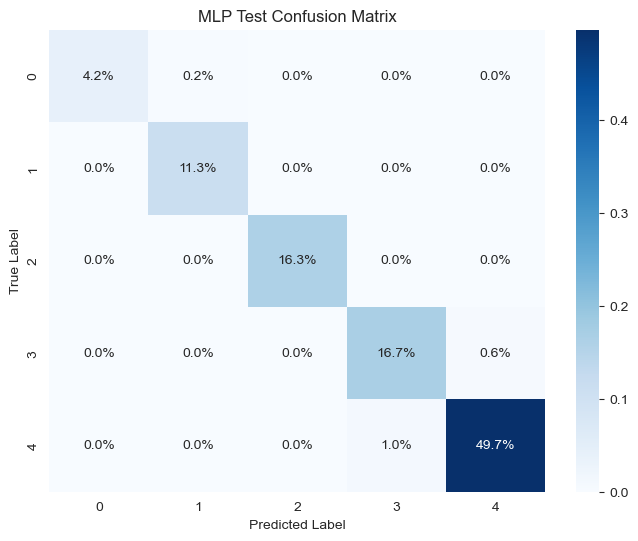

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step A: Encode your target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # learn mapping on train
y_val_enc   = le.transform(y_val)         # apply same mapping
y_test_enc  = le.transform(y_test)

# Step B: Instantiate & train your “deep” MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=200,
    batch_size=32,
    early_stopping=True,
    validation_fraction=0.16,
    n_iter_no_change=5,
    random_state=42
)
mlp.fit(X_train, y_train_enc)

# Step C: Evaluate on validation and test sets
for split, X_, y_ in [('Validation', X_val, y_val_enc), ('Test', X_test, y_test_enc)]:
    preds = mlp.predict(X_)
    print(f"\nMLP {split} Accuracy: {accuracy_score(y_, preds):.4f}")
    print(f"MLP {split} Classification Report:\n{classification_report(y_, preds)}")
    cm = confusion_matrix(y_, preds)

    # Heatmap
    cm_prob = cm / np.sum(cm)
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    sns.heatmap(cm_prob, annot=True, cmap='Blues', fmt='.1%')
    plt.title(f'MLP {split} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()





=== Validation Metrics ===
Accuracy: 0.9843
Macro F1: 0.9864804707379135
Per‑class precision, recall, f1:
 Class 0 → Precision: 1.00, Recall: 1.00, F1: 1.00
 Class 1 → Precision: 1.00, Recall: 1.00, F1: 1.00
 Class 2 → Precision: 1.00, Recall: 0.98, F1: 0.99
 Class 3 → Precision: 0.98, Recall: 0.92, F1: 0.95
 Class 4 → Precision: 0.97, Recall: 1.00, F1: 0.99


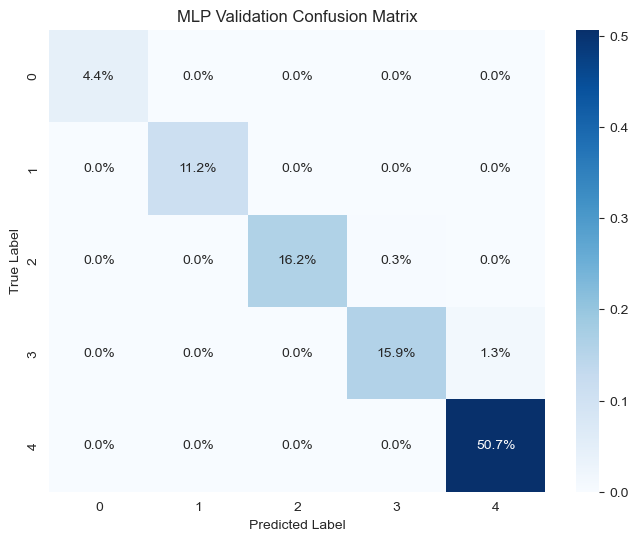


=== Test Metrics ===
Accuracy: 0.9812
Macro F1: 0.9804574941864146
Per‑class precision, recall, f1:
 Class 0 → Precision: 1.00, Recall: 0.95, F1: 0.98
 Class 1 → Precision: 0.98, Recall: 1.00, F1: 0.99
 Class 2 → Precision: 1.00, Recall: 1.00, F1: 1.00
 Class 3 → Precision: 0.94, Recall: 0.96, F1: 0.95
 Class 4 → Precision: 0.99, Recall: 0.98, F1: 0.98


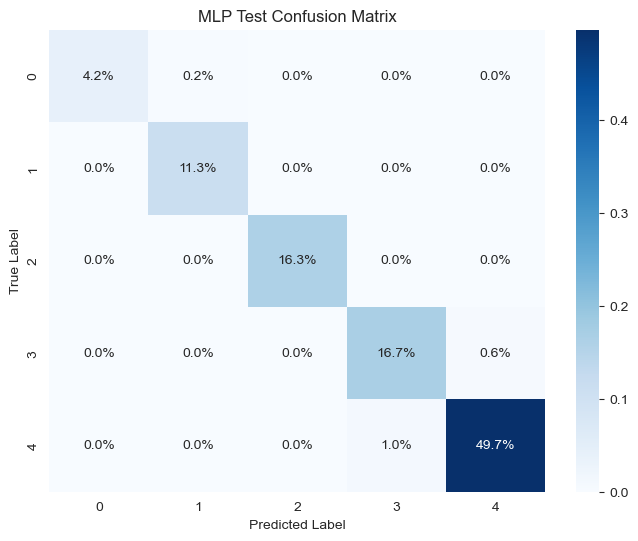

In [40]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for split, X_, y_true in [('Validation', X_val, y_val_enc), ('Test', X_test, y_test_enc)]:
    y_pred = mlp.predict(X_)
    print(f"\n=== {split} Metrics ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Macro F1:", f1_score(y_true, y_pred, average='macro'))
    print("Per‑class precision, recall, f1:")
    for cls in np.unique(y_true):
        p = precision_score(y_true, y_pred, labels=[cls], average='micro')
        r = recall_score(y_true, y_pred, labels=[cls], average='micro')
        f = f1_score(y_true, y_pred, labels=[cls], average='micro')
        print(f" Class {cls} → Precision: {p:.2f}, Recall: {r:.2f}, F1: {f:.2f}")
    cm = confusion_matrix(y_true, y_pred)

    # Heatmap
    cm_prob = cm / np.sum(cm)
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    sns.heatmap(cm_prob, annot=True, cmap='Blues', fmt='.1%')
    plt.title(f'MLP {split} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Visulaze Logistic  Regression Model with MLPClassifier( DeepLearning) model

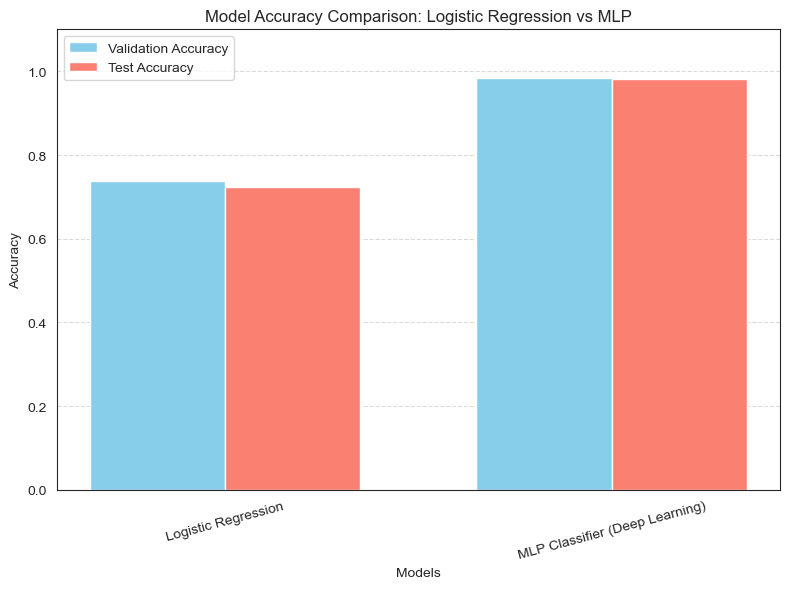

In [41]:
# Accuracy scores
models = ['Logistic Regression', 'MLP Classifier (Deep Learning)']
val_accuracy = [0.7389, 0.9843]
test_accuracy = [0.7244, 0.9812]

# Bar width and positions
bar_width = 0.35
x = range(len(models))

# Create plot
plt.figure(figsize=(8, 6))
plt.bar(x, val_accuracy, width=bar_width, label='Validation Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], test_accuracy, width=bar_width, label='Test Accuracy', color='salmon')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Logistic Regression vs MLP')
plt.xticks([i + bar_width / 2 for i in x], models, rotation=15)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

Deep Learning Artifacts Saving (MLPClassifier)

In [42]:
import joblib
import os


# Make sure the artifacts directory exists
os.makedirs("artifacts", exist_ok=True)

# Save the MLP model and the label encoder
joblib.dump(mlp, "artifacts/final_mlp_model.pkl")
joblib.dump(le, "artifacts/final_label_encoder.pkl")
joblib.dump(scaler, "artifacts/final_scaler.pkl")  # Saving your StandardScaler

# Save deep learning predictions on the test set
mlp_test_preds = mlp.predict(X_test)

mlp_predictions_df = pd.DataFrame({
    'Actual': le.inverse_transform(y_test_enc),
    'Predicted': le.inverse_transform(mlp_test_preds)
})
mlp_predictions_df.to_csv("artifacts/final_mlp_predictions.csv", index=False)

# Optionally save final test metrics
from sklearn.metrics import accuracy_score, classification_report

metrics_report = classification_report(y_test_enc, mlp_test_preds, output_dict=True)
metrics_df = pd.DataFrame(metrics_report).transpose()
metrics_df.to_csv("artifacts/final_mlp_metrics.csv", index=True)

print("✅ Deep Learning artifacts saved successfully.")


✅ Deep Learning artifacts saved successfully.


In [43]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


features_to_use = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
                   'StudyTimeWeekly', 'Absences', 'Tutoring',
                   'ParentalSupport', 'Extracurricular', 'Sports',
                   'Music', 'Volunteering']

X = df[features_to_use]
y = df['GradeClass']

# Train/validation/test split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

#SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_enc_resampled = smote.fit_resample(X_train, y_train_enc)

#  Define and train MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(7,7),
    activation='relu',
    solver='adam',
    max_iter=200,
    batch_size=32,
    early_stopping=True,
    validation_fraction=0.16,
    n_iter_no_change=5,  
    random_state=42
)

mlp.fit(X_train_resampled, y_train_enc_resampled)

# Evaluate model on validation and test sets and check accuray
for split, X_, y_ in [('Validation', X_val, y_val_enc), ('Test', X_test, y_test_enc)]:
    preds = mlp.predict(X_)
    print(f"\n MLP {split} Accuracy: {accuracy_score(y_, preds):.4f}")
    print(f" MLP {split} Classification Report:\n{classification_report(y_, preds)}")
    print(f" MLP {split} Confusion Matrix:\n{confusion_matrix(y_, preds)}")

train_acc = mlp.score(X_train, y_train)
test_acc = mlp.score(X_test, y_test)
print(f"\nTraining Accuracy: {train_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Difference: {abs(train_acc - test_acc):.2%}")



 MLP Validation Accuracy: 0.6546
 MLP Validation Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.38      0.27        16
           1       0.39      0.35      0.37        40
           2       0.53      0.54      0.54        59
           3       0.47      0.56      0.51        62
           4       0.93      0.81      0.87       182

    accuracy                           0.65       359
   macro avg       0.51      0.53      0.51       359
weighted avg       0.69      0.65      0.67       359

 MLP Validation Confusion Matrix:
[[  6   4   1   3   2]
 [ 12  14  10   1   3]
 [  1  15  32  11   0]
 [  3   1  16  35   7]
 [  7   2   1  24 148]]

 MLP Test Accuracy: 0.6908
 MLP Test Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.44      0.35        16
           1       0.52      0.34      0.41        41
           2       0.57      0.52      0.54        58
          

In [45]:

joblib.dump(mlp, "mlp_model_smote.pkl")
joblib.dump(scaler, "mlp_scaler.pkl")
joblib.dump(le, "mlp_label_encoder.pkl")
joblib.dump(features_to_use, "mlp_features.pkl")

['mlp_features.pkl']

In [46]:
df.shape

(2392, 13)